In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('haberman.csv')

In [3]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data.shape

(306, 4)

In [40]:
data['status'].unique()

array([1, 2], dtype=int64)

In [41]:
data['nodes'].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [6]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

The data is imbalanced

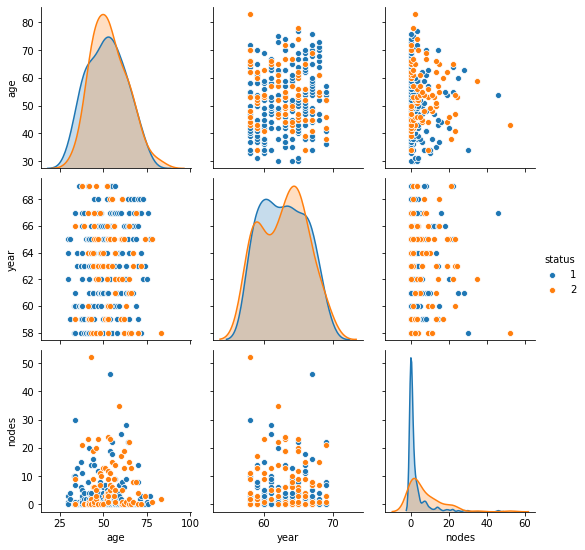

In [15]:
sns.pairplot(data, hue="status")
plt.show()
plt.close()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


There is no missing values in the dataframe

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


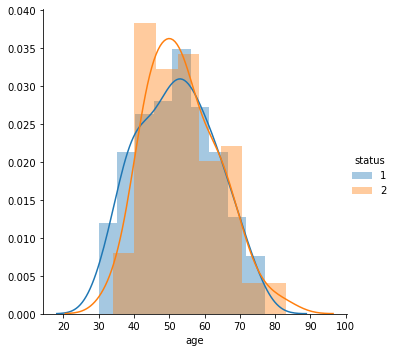

In [9]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "age").add_legend()
plt.show()


PDF of above figure is overlapping between two class 1 and class 2

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


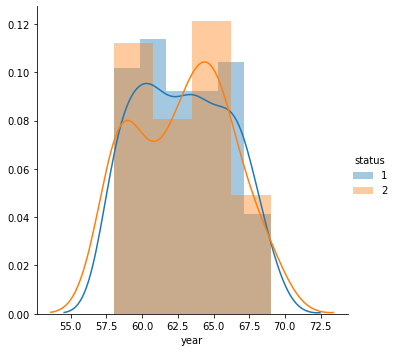

In [10]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "year").add_legend();
plt.show()

PDF Between two class 1 and class 2 is overlapping 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


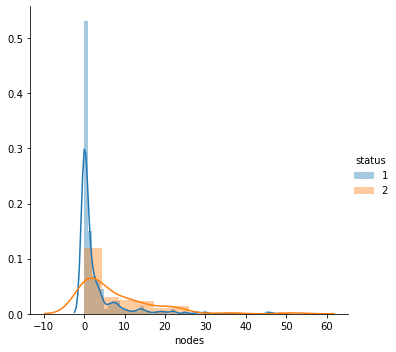

In [11]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
plt.show()

PDF of class 1 and class 2 it has been obseved that 50% to 60% have survived having nodes 0 to 5

In [12]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


1. It has been observed that Average age of 52 and Average Nodes 4 hav been survied within 5 years
2. People having Minimum Age has been Survived
3. 25% to 75% of people having age between 44 to 60 and nodes between 0 to 4  have been survived within 5 years
4. People with Maximum age has not survived

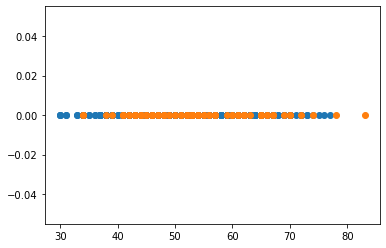

In [19]:
status_1 = data.loc[data['status']==1];
status_2 = data.loc[data['status']==2];
plt.plot(status_1['age'],np.zeros_like(status_1['age']),"o")
plt.plot(status_2['age'],np.zeros_like(status_2['age']),"o")
plt.show()


1. It has been observe that most of the people have died at the age between 40 to 65 
2. Above the age 80 no one has survived

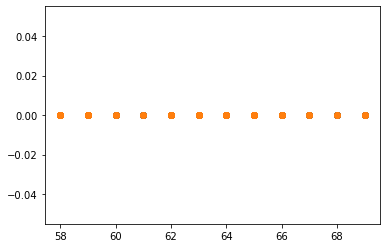

In [21]:
status_1 = data.loc[data['status']==1];
status_2 = data.loc[data['status']==2];
plt.plot(status_1['year'],np.zeros_like(status_1['year']),"o")
plt.plot(status_2['year'],np.zeros_like(status_2['year']),"o")
plt.show()

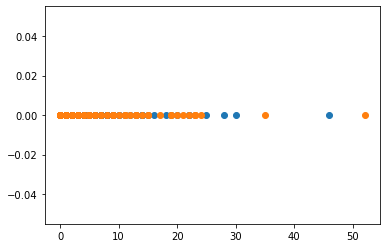

In [22]:
status_1 = data.loc[data['status']==1];
status_2 = data.loc[data['status']==2];
plt.plot(status_1['nodes'],np.zeros_like(status_1['nodes']),"o")
plt.plot(status_2['nodes'],np.zeros_like(status_2['nodes']),"o")
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


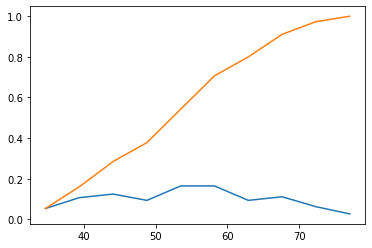

In [30]:
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


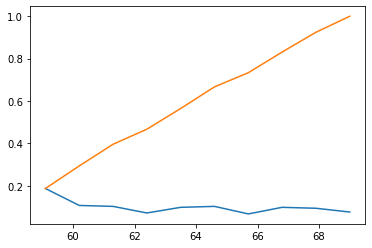

In [31]:
counts, bin_edges = np.histogram(status_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


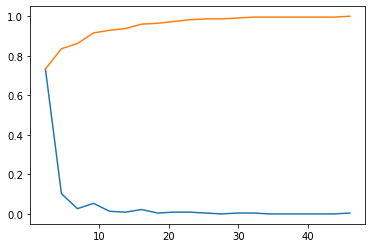

In [42]:
counts, bin_edges = np.histogram(status_1['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

1. It has been observed that 85% of people have been survived nodes having between 0 to 5

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


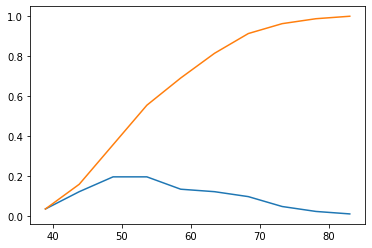

In [35]:
counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

1. Most of the people having Age between 50 to 60 has not been survived

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


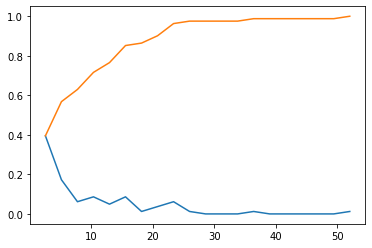

In [39]:
counts, bin_edges = np.histogram(status_2['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

1. It has been observed that less people have been not survied having nodes 0 to 5
2. Most of the peole have no survived having nodes grater than 15